In [2]:
%reload_ext autoreload
%autoreload 2

# import sys
import numpy as np
# numpy.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(threshold= np.inf)

from Grid import Grid, Point
from Engine import Engine
import initial_states

init_config = {'tip_cells': [Point(1,1)],
               'attractor_cells': initial_states.Attractors_small}
grid = Grid(width=20, height=20, init_config=init_config)
engine = Engine(init_grid=grid, generations=10)
engine.run()

{(-1, 0): 4, (0, 1): 5, (1, 0): 4, (-1, -1): 3, (1, -1): 3, (-1, 1): 4, (1, 1): 5, (0, -1): 3}


AttributeError: 'list' object has no attribute 'x'

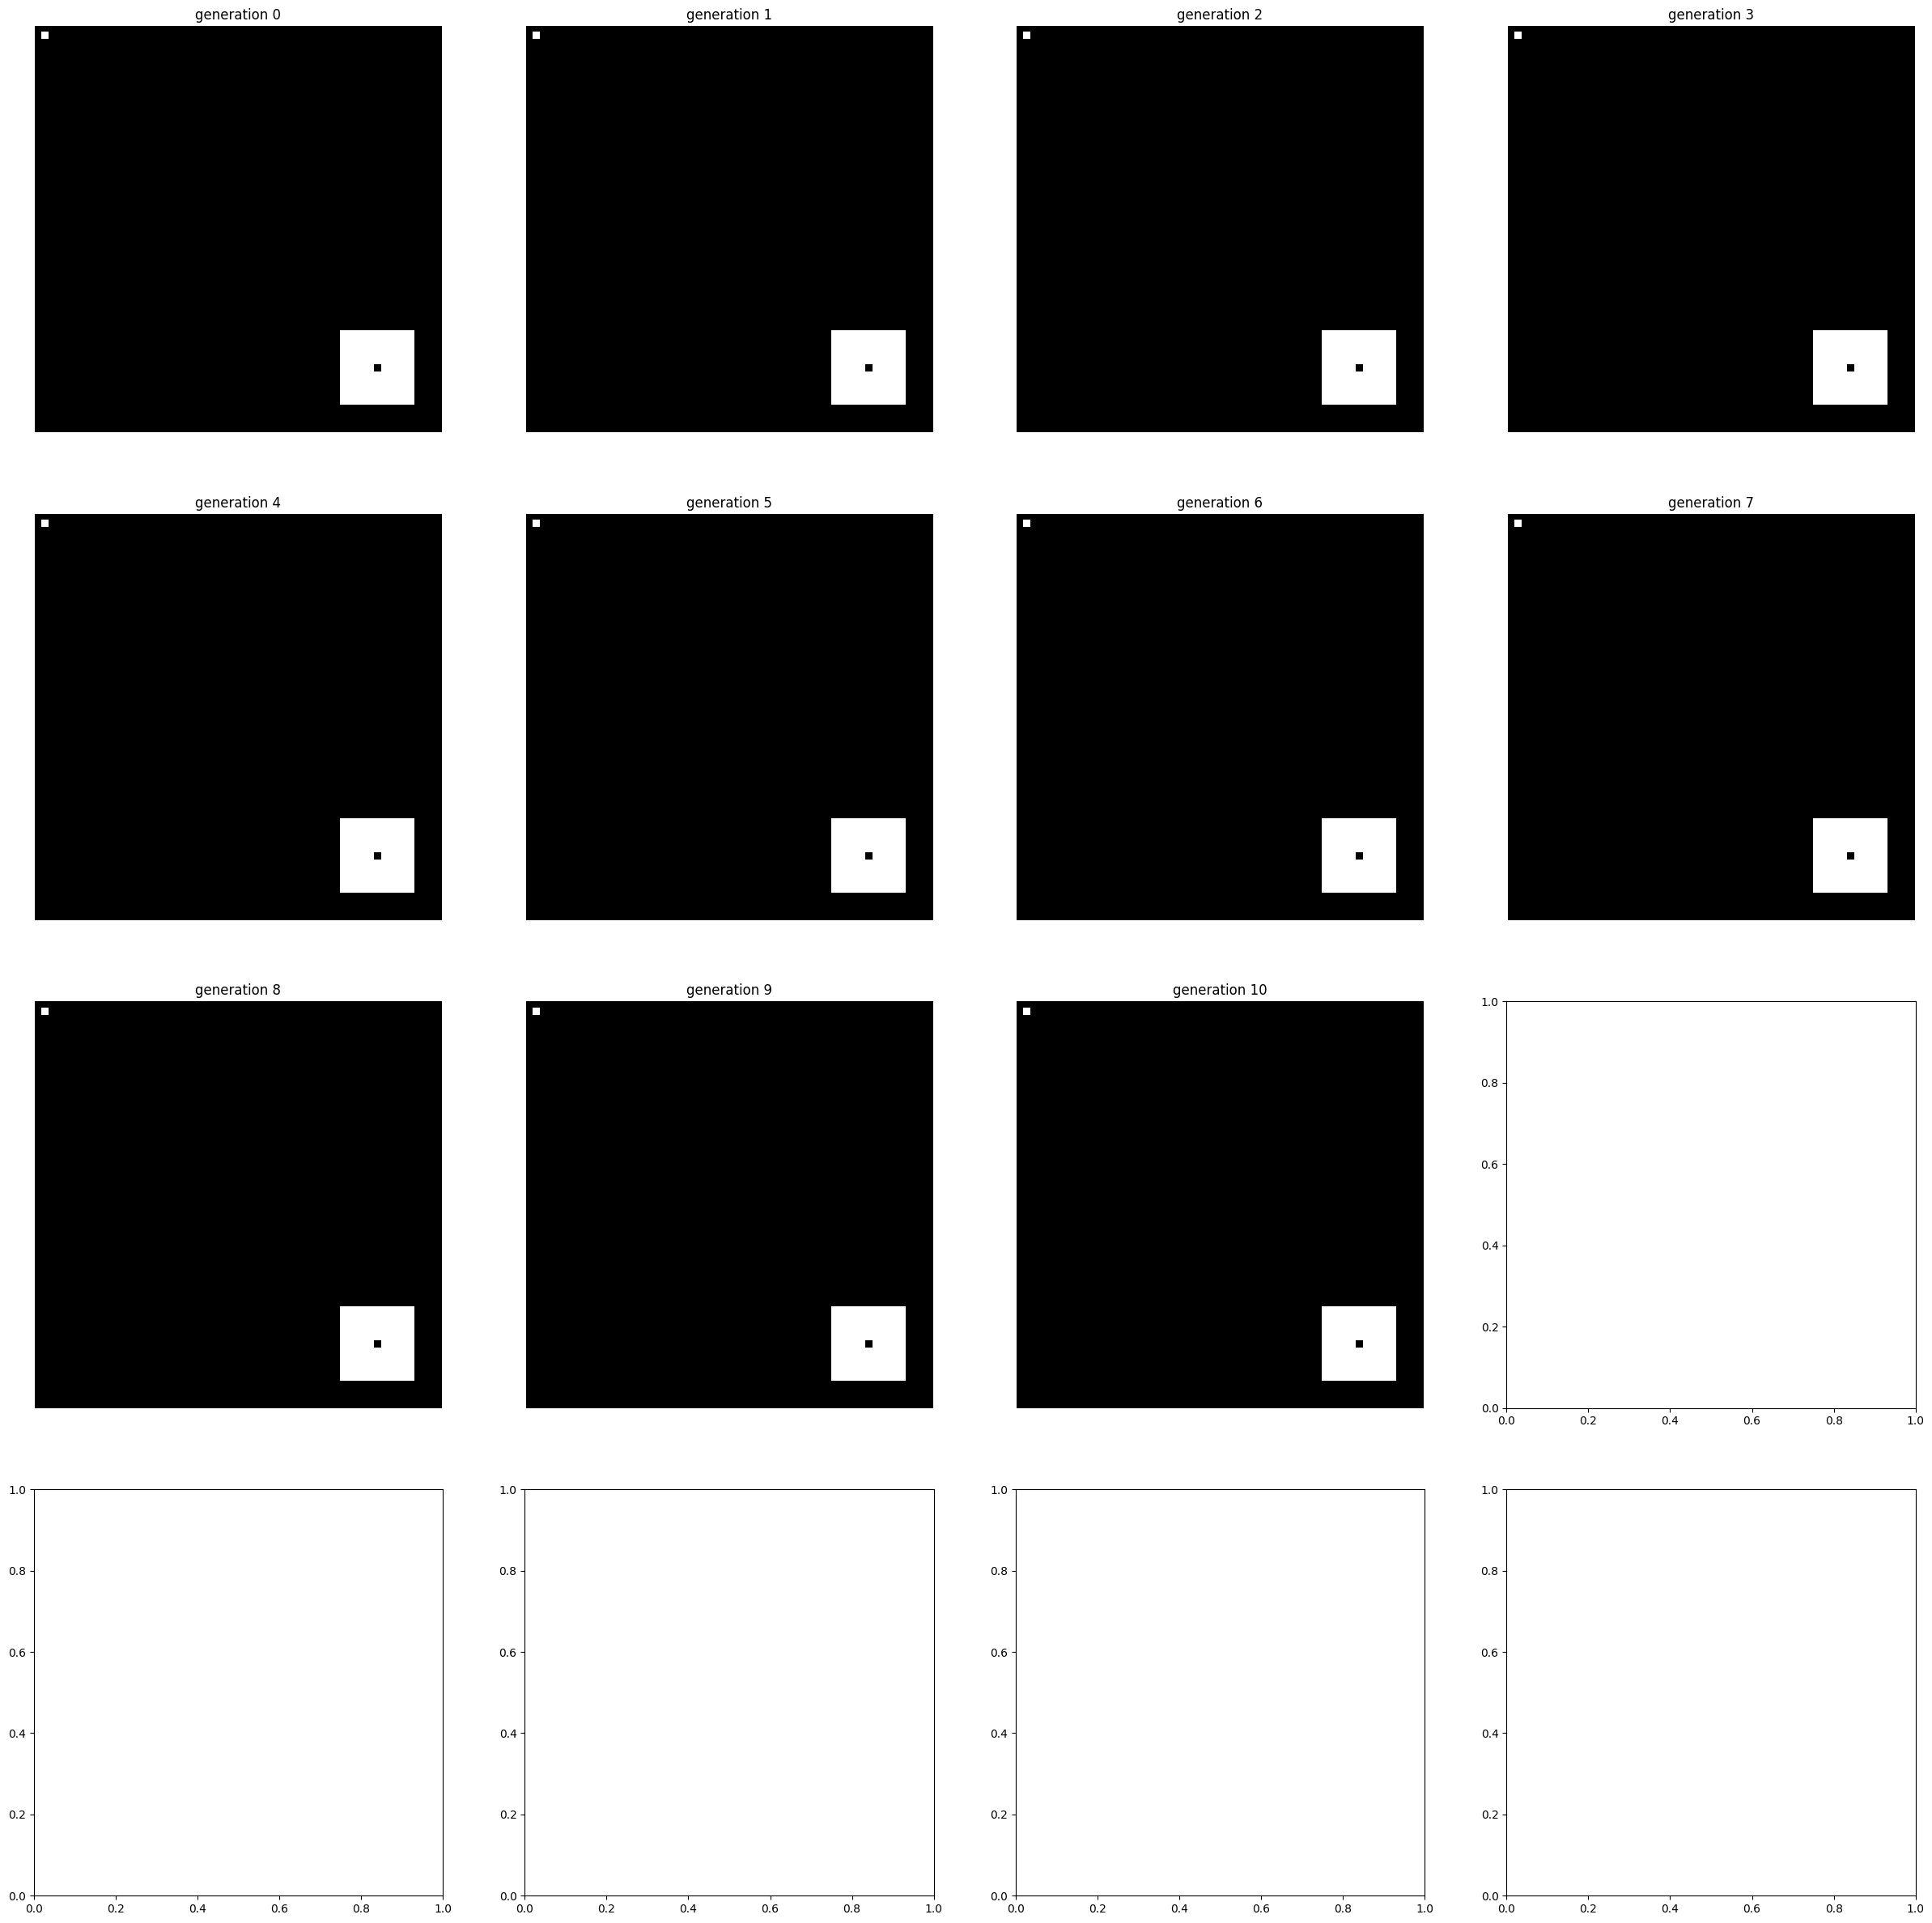

In [2]:
engine.visualize()

In [5]:
def get_tile_radius_outer_ring(location : Point, radius, max_width, max_height):
    horizontal =  lambda x, y : [Point(x2, y2) for x2 in (x-radius, x+radius)
                            for y2 in range(y-radius, y+radius+1)
                            if (0 <= x < max_width and
                                0 <= y < max_height and
                                (x != x2 or y != y2) and
                                (0 <= x2 < max_width) and
                                (0 <= y2 < max_height))]
                            
    vertical =  lambda x, y : [Point(x2, y2) for x2 in range(x-radius, x+radius+1)
                        for y2 in (y-radius, y+radius)
                        if (0 <= x < max_width and
                            0 <= y < max_height and
                            (x != x2 or y != y2) and
                            (0 <= x2 < max_width) and
                            (0 <= y2 < max_height))]
    
    return set(horizontal(location.x, location.y) + vertical(location.x, location.y))

get_tile_radius_outer_ring(Point(19,18), radius=1, max_height=20, max_width=20)

{(18, 17), (18, 18), (18, 19), (19, 17), (19, 19)}